In [1]:
import sklearn
import pandas as pd
import numpy as np

In [2]:
dat = pd.read_csv("https://www.dropbox.com/scl/fi/yf8t1x0uvrln93dzi6xd8/housing_small.csv?rlkey=uen32y937kqarrjra0v6jaez4&dl=1")

In [3]:
y = dat['SalePrice']
X = dat[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood_NAmes', 'Neighborhood_NWAmes']]

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

,Gr Liv Area,Bedroom AbvGr,Neighborhood_NAmes,Neighborhood_NWAmes
54,827,2,True,False
1,1329,3,True,False
98,864,3,True,False
64,1116,3,True,False
11,1337,2,True,False
22,1209,3,True,False
47,1580,3,True,False
9,882,2,True,False
0,896,2,True,False
14,1610,3,False,True


In [11]:
lr_fit = lr.fit(X_train, y_train)
dt_fit = dt.fit(X_train, y_train)
knn_fit = knn.fit(X_train, y_train)

In [12]:
y_pred_knn = knn_fit.predict(X_test)
y_pred_lr = lr_fit.predict(X_test)
y_pred_dt = dt_fit.predict(X_test)

In [22]:
import plotnine
from plotnine import *

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


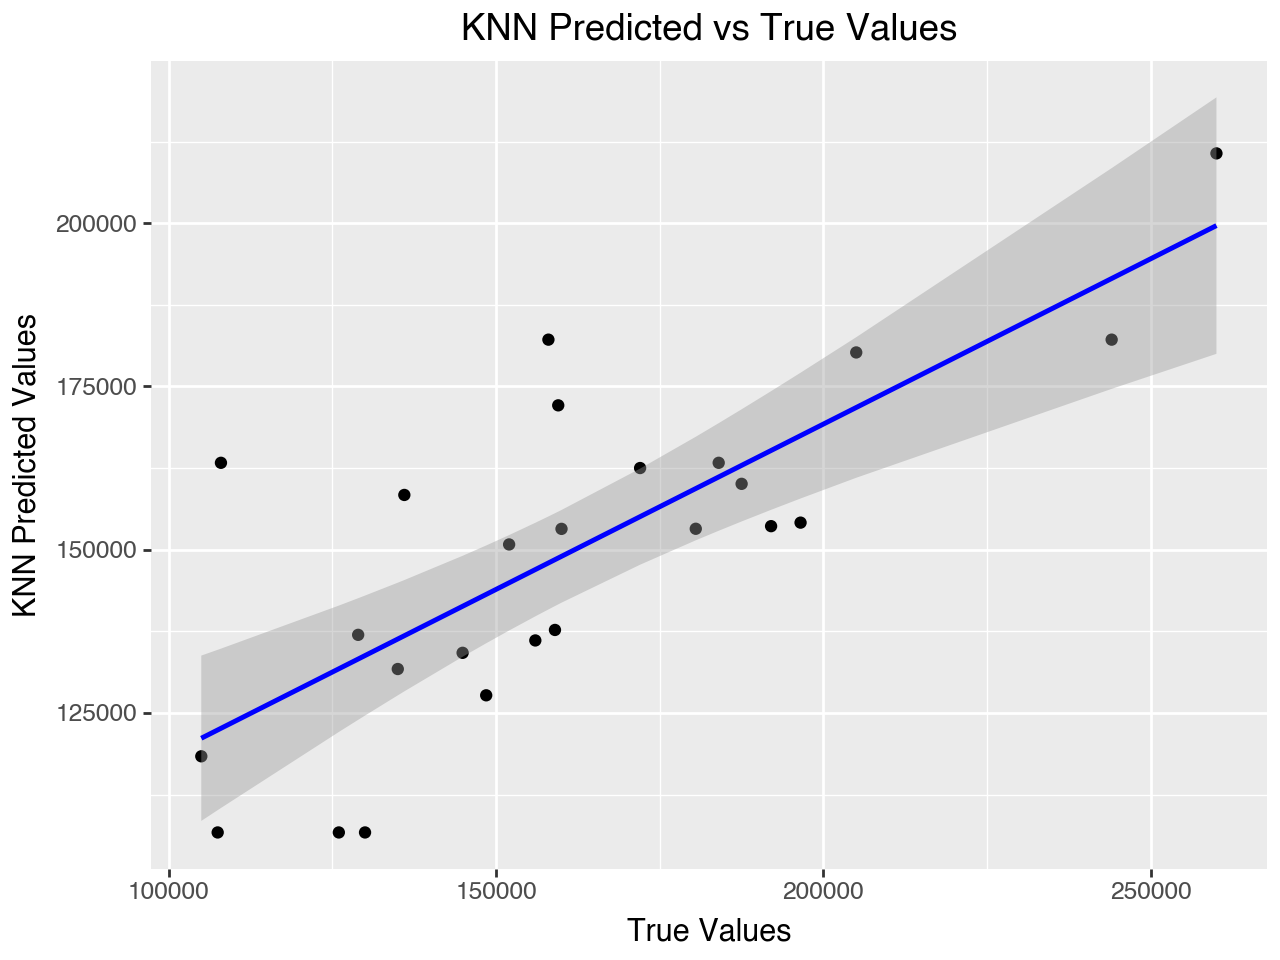

In [25]:
df = pd.DataFrame({
    "True_Ys": y_test,
    "Y_knn": y_pred_knn,
    "Y_lr": y_pred_lr,
    "Y_dt": y_pred_dt
})

plot = (ggplot(df, aes(x='True_Ys', y='Y_knn')) + 
        geom_point() +  # Scatter plot
        geom_smooth(method='lm', color='blue') +  # Add a smooth line
        labs(title="KNN Predicted vs True Values", x="True Values", y="KNN Predicted Values"))


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


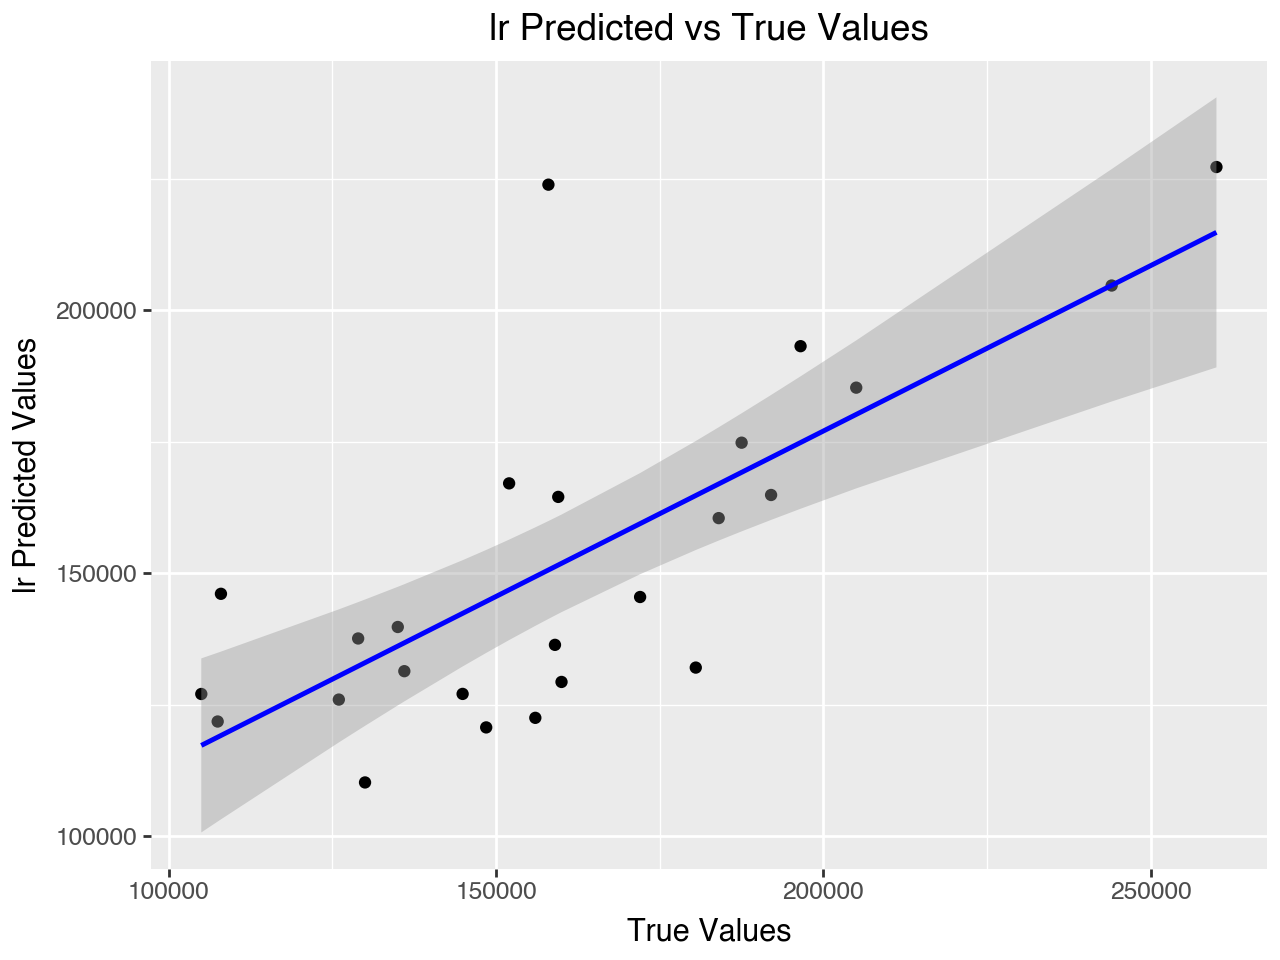

In [28]:
plot = (ggplot(df, aes(x='True_Ys', y='Y_lr')) + 
        geom_point() +  # Scatter plot
        geom_smooth(method='lm', color='blue') +  # Add a smooth line
        labs(title="lr Predicted vs True Values", x="True Values", y="lr Predicted Values"))

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


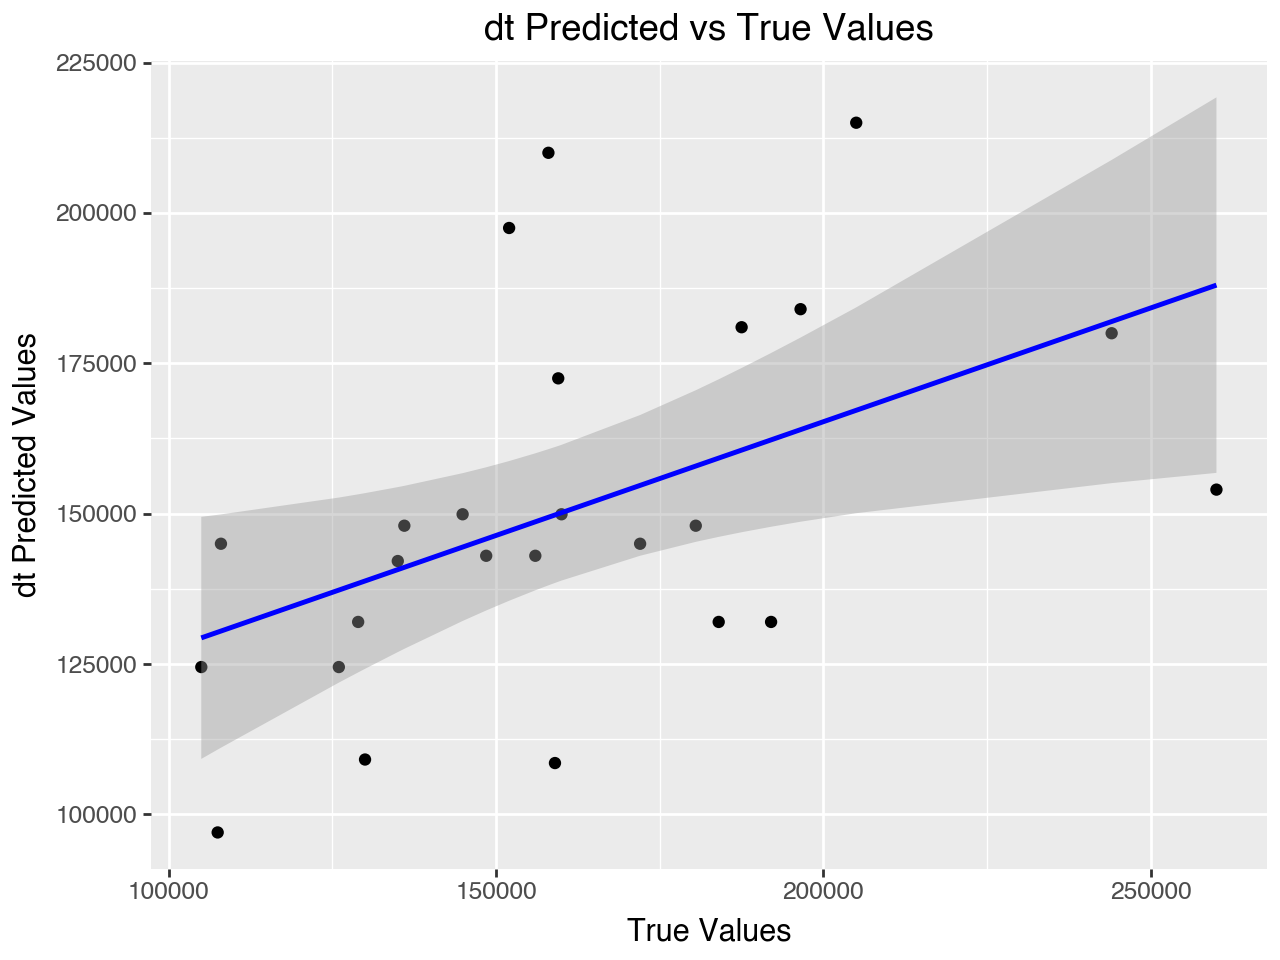

In [27]:
plot = (ggplot(df, aes(x='True_Ys', y='Y_dt')) + 
        geom_point() +  # Scatter plot
        geom_smooth(method='lm', color='blue') +  # Add a smooth line
        labs(title="dt Predicted vs True Values", x="True Values", y="dt Predicted Values"))

In [21]:
from sklearn.metrics import mean_squared_error

#mean_squared_error(y_test, y_pred_knn)
mean_squared_error(y_test, y_pred_lr)
#mean_squared_error(y_test, y_pred_dt)

736866093.6731386

In [14]:
final_model = lr.fit(X, y)
final_model.coef_

array([    74.37717581, -13083.50151923,  -7484.17760684,   7484.17760684])